<a href="https://colab.research.google.com/github/filipabramowicz/ML_AI_course/blob/main/notes_from_lab03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Imports needed later:

In [1]:
#@title Everyday life's import

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Nice printing
import pprint

# Data processing
import numpy as np
import pandas as pd

# Data transformation
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from numpy import log

# Data preparation for learning, model selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
import sklearn.model_selection as ms

# Linear regression
from sklearn import linear_model
from sklearn.linear_model import Ridge, Lasso

# Processing pipelining
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

# Quality indicators
from sklearn import metrics

Let's load some data:

In [2]:
#@title Simple data acquisition for regression
#@markdown * Data on mammals: a popular example for regression.
#@markdown * Example based on: Jesus Rogel-Salazar, *Data Science and Analysis with Python*, CRC Press, Boca Raton 2017. **Chapter 4**

mammals = pd.read_csv("https://ndownloader.figshare.com/files/2332069")

mammals

,Mammal,body,brain
0,Arctic fox,3.385,44.5
1,Owl monkey,0.480,15.5
2,Mountain beaver,1.350,8.1
3,Cow,465.000,423.0
4,Grey wolf,36.330,119.5
...,...,...,...
57,Brazilian tapir,160.000,169.0
58,Tenrec,0.900,2.6
59,Phalanger,1.620,11.4
60,Tree shrew,0.104,2.5


In [3]:
#@markdown Basic information on data

print(f'Columns: {mammals.columns}')
print(f'Dimensions: {mammals.shape}')
print(f'Number of rows: {len(mammals)}') # or: mammals.shape[0]
print(f'Number of elements: {mammals.size}')

Columns: Index(['Mammal', 'body', 'brain'], dtype='object')
Dimensions: (62, 3)
Number of rows: 62
Number of elements: 186


In [8]:
#@markdown A few random samples (approx. 10%)

print('The last three rows:',mammals.iloc[-3:,:])

print('\nSome random elements:')
mammals.sample(19)

The last three rows:         Mammal   body  brain
59   Phalanger  1.620   11.4
60  Tree shrew  0.104    2.5
61     Red fox  4.235   50.4

Some random elements:


,Mammal,body,brain
27,Giraffe,529.000,680.00
0,Arctic fox,3.385,44.50
54,Musk shrew,0.048,0.33
35,Kangaroo,35.000,56.00
47,Desert hedgehog,0.550,2.40
2,Mountain beaver,1.350,8.10
24,Cat,3.300,25.60
50,Raccoon,4.288,39.20
18,Asian elephant,2547.000,4603.00
52,E. American mole,0.075,1.20


# Exercise number 1

For the `mammals` data perform as much data review and pre-processing as possible:
1. Show the distibution of data.
2. Plot variables (histograms for both attributes; and for single attributes), violin plots, provide a pair plot, find correlations.
3. Perform basic statistical analysis: how many samples? what are the means, standard deviations, min, max, quartile values?
4. Can we see outliers? At least a box plot can be helpful. BTW. do we really have outliers here? When you cut 'outliers' how other plots look like?
5. Any missing or correctable data?
6. Feature selection, extraction?
7. Transformation of data: maxmin or z-score scaler would be helpful. How does it influence correlations?

In [32]:
#@title SOLUTION Exercise no. 1

print('Basic statistical description:\n', mammals.describe())
# mammals_cut = mammals.drop(mammals[(mammals['body'] >= 48) & (mammals['brain'] >= 166)].index)
mammals_cut = mammals.drop(mammals[(mammals['body'] >= 48) | (mammals['brain'] >= 166)].index)
# print(mammals_cut)
print(mammals_cut.describe())

Basic statistical description:
               body        brain
count    62.000000    62.000000
mean    198.789984   283.134194
std     899.158011   930.278942
min       0.005000     0.140000
25%       0.600000     4.250000
50%       3.342500    17.250000
75%      48.202500   166.000000
max    6654.000000  5712.000000
            body       brain
count  44.000000   44.000000
mean    4.110659   21.836818
std     8.425899   32.605560
min     0.005000    0.140000
25%     0.180500    2.575000
50%     1.195000    7.350000
75%     3.500000   22.000000
max    36.330000  119.500000


<Figure size 432x288 with 0 Axes>

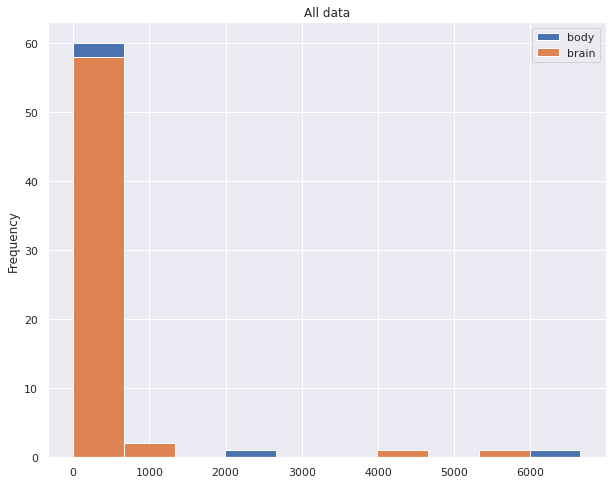

In [42]:
labels_mammals = ['body', 'brain']

# Histogram for both attributes: all data
plt.figure()
mammals[['body', 'brain']].plot.hist(bins=10, alpha=1, figsize=(10, 8))
plt.title('All data')
plt.show()


<Figure size 432x288 with 0 Axes>

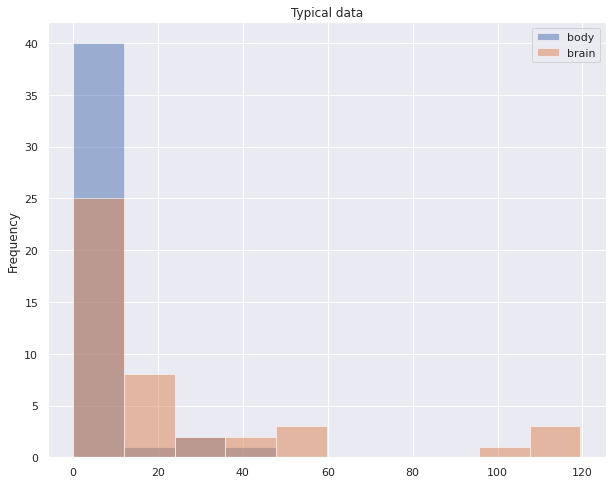

In [43]:
# Histogram for both attributes: `typical` data
plt.figure()
mammals_cut[['body', 'brain']].plot.hist(bins=10, alpha=0.5, figsize=(10, 8))
plt.title('Typical data')
plt.show()


<Figure size 432x288 with 0 Axes>

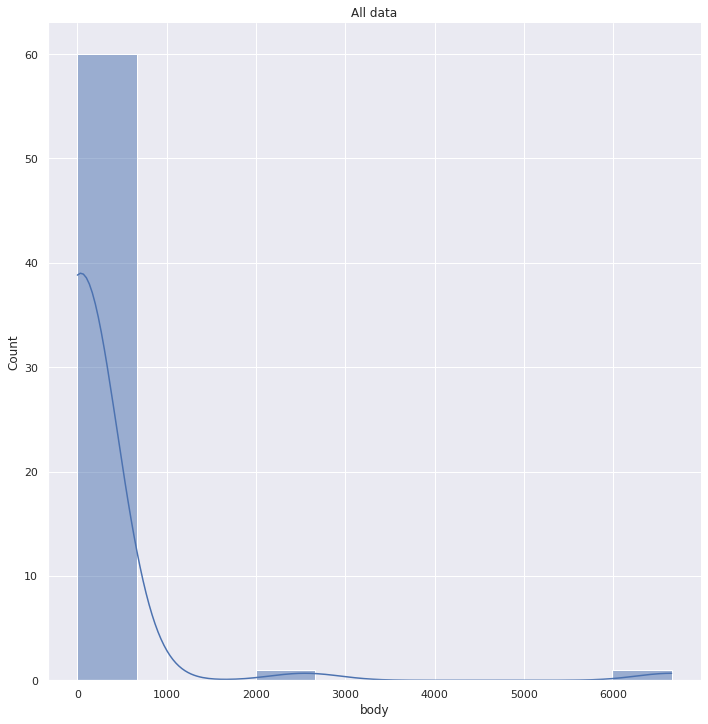

In [44]:
# Histogram for body with KDE: all data
plt.figure()
sns.displot(data=mammals[['body']], x="body", bins=10, kde=True, height=10, aspect=1.0)
plt.title('All data')
plt.show()

<Figure size 432x288 with 0 Axes>

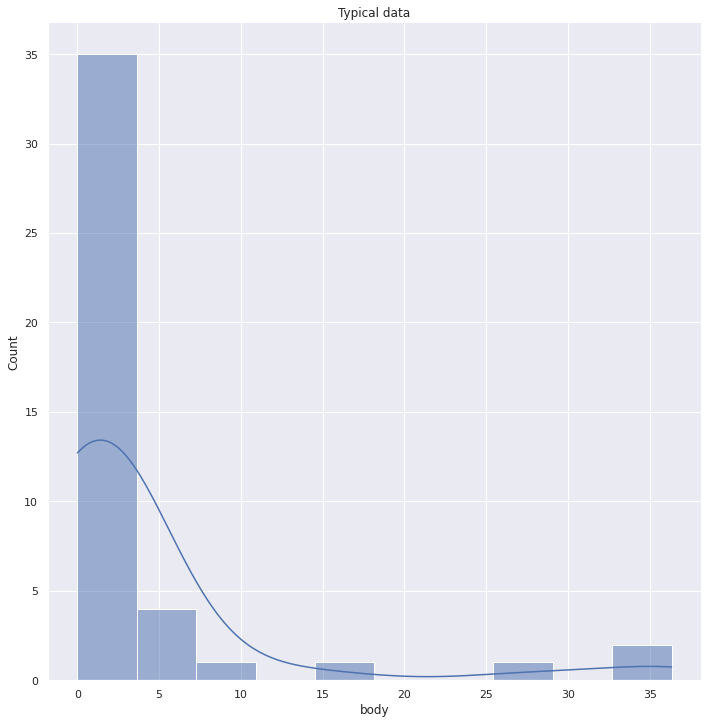

In [45]:
# Histogram for body with KDE: `typical' data
plt.figure()
sns.displot(data=mammals_cut[['body']], x="body", bins=10, kde=True, height=10, aspect=1.0)
plt.title('Typical data')
plt.show()

<Figure size 432x288 with 0 Axes>

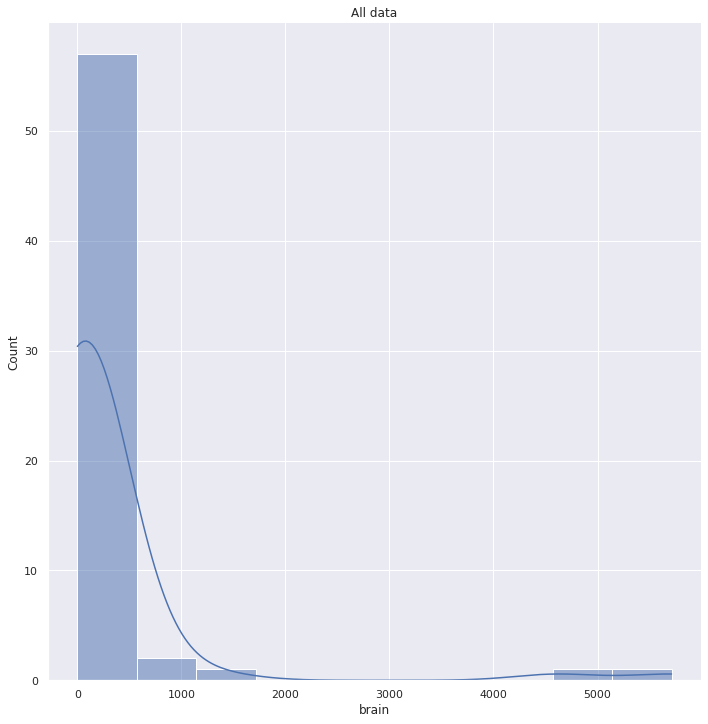

In [47]:
# Histogram for brain with KDE: all data
plt.figure()
sns.displot(data=mammals[['brain']], x="brain", bins=10, kde=True, height=10, aspect=1.0)
plt.title('All data')
plt.show()

<Figure size 432x288 with 0 Axes>

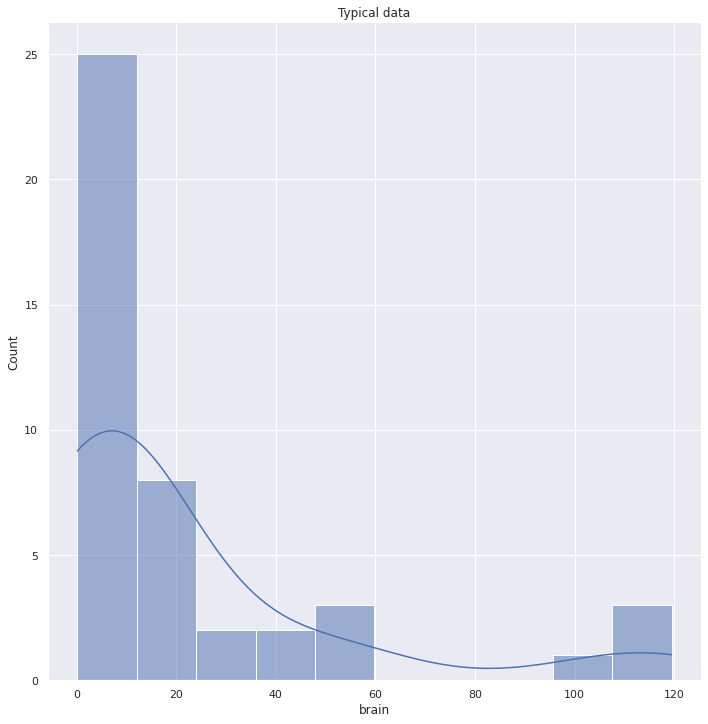

In [48]:
# Histogram for brain with KDE: `typical' data
plt.figure()
sns.displot(data=mammals_cut[['brain']], x="brain", bins=10, kde=True, height=10, aspect=1.0)
plt.title('Typical data')
plt.show()

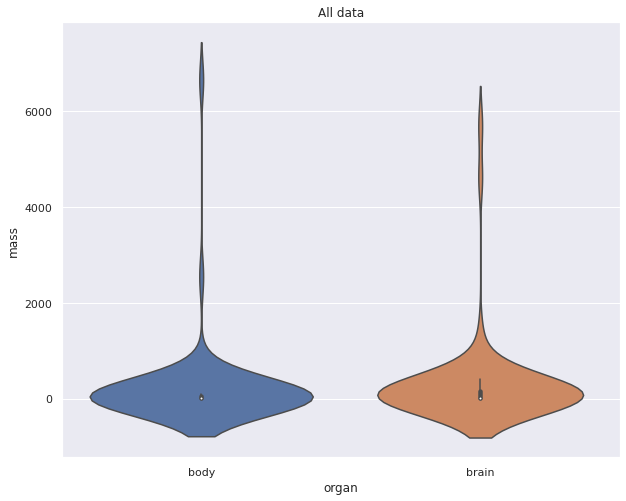

In [49]:
# Violin plot: all data
combined_data = mammals[['body', 'brain']].melt(var_name='organ', value_name='mass')
plt.figure(figsize=(10, 8))
sns.violinplot(x='organ', y='mass', data=combined_data)
# plt.xlabel('')
plt.ylabel('mass')
plt.title('All data')
plt.show()

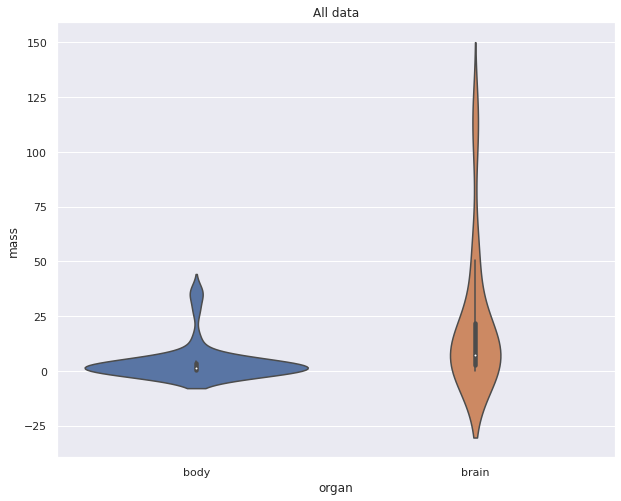

In [50]:
# Violin plot: `typical` data
combined_data_cut = mammals_cut[['body', 'brain']].melt(var_name='organ', value_name='mass')
plt.figure(figsize=(10, 8))
sns.violinplot(x='organ', y='mass', data=combined_data_cut)
# plt.xlabel('')
plt.ylabel('mass')
plt.title('All data')
plt.show()

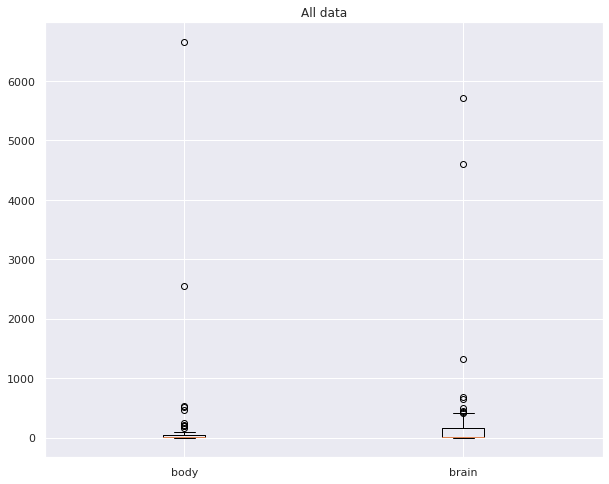

In [51]:
# Box plot: all data
plt.figure(figsize=(10, 8))
ax = plt.axes()
mammals_array = mammals[labels_mammals].to_numpy()
plt.boxplot(mammals_array)
ax.set_xticklabels(labels_mammals)
plt.title('All data')
plt.show()

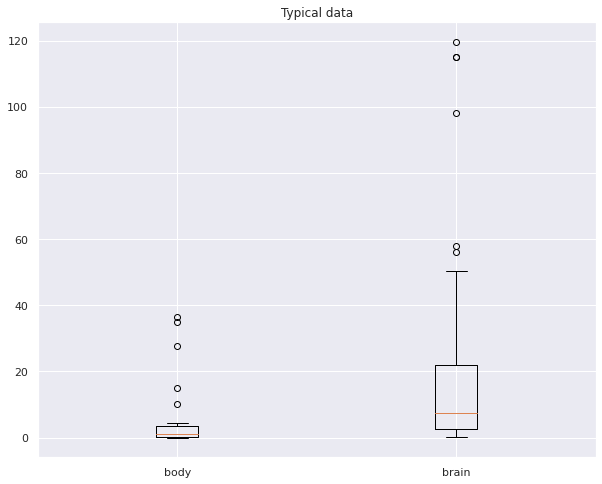

In [52]:
# Box plot: `typical` data
plt.figure(figsize=(10, 8))
ax = plt.axes()
mammals_array_cut = mammals_cut[labels_mammals].to_numpy()
plt.boxplot(mammals_array_cut)
ax.set_xticklabels(labels_mammals)
plt.title('Typical data')
plt.show()

In [53]:
# Max-min scaling
from sklearn.preprocessing import MinMaxScaler

scaler_mm = MinMaxScaler()
mammals_mm = pd.DataFrame(scaler_mm.fit_transform(
    mammals[labels_mammals]),
    columns=labels_mammals
    )

print(mammals_mm.groupby(lambda idx: 0).agg(['min','mean','max','std']))

  body                          brain                         
   min      mean  max       std   min      mean  max       std
0  0.0  0.029875  1.0  0.135131   0.0  0.049545  1.0  0.162868


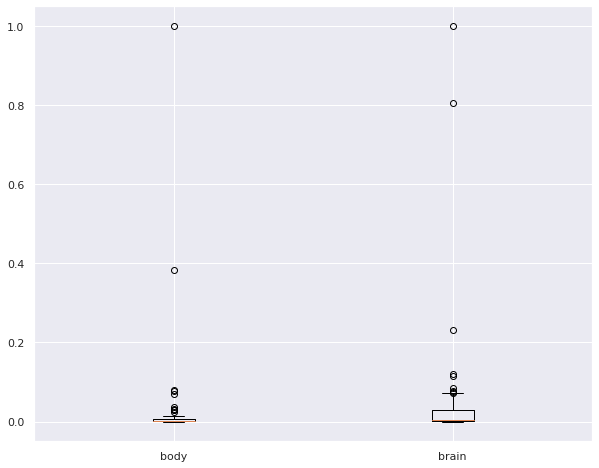

In [54]:
plt.figure(figsize=(10, 8))
ax = plt.axes()
mammals_mm = mammals_mm[labels_mammals].to_numpy()
plt.boxplot(mammals_mm)
ax.set_xticklabels(labels_mammals);
plt.show()

In [55]:
# z-Score scaling
from sklearn.preprocessing import StandardScaler

scaler_z = StandardScaler()
mammals_z = pd.DataFrame(scaler_z.fit_transform(
    mammals[labels_mammals]),
    columns=labels_mammals
    )

print(mammals_z.groupby(lambda idx: 0).agg(['min','mean','max','std']))

       body                                       brain                \
        min          mean       max       std       min          mean   
0 -0.222884 -1.029642e-17  7.237778  1.008163 -0.306687 -4.297638e-17   

                       
        max       std  
0  5.883379  1.008163  


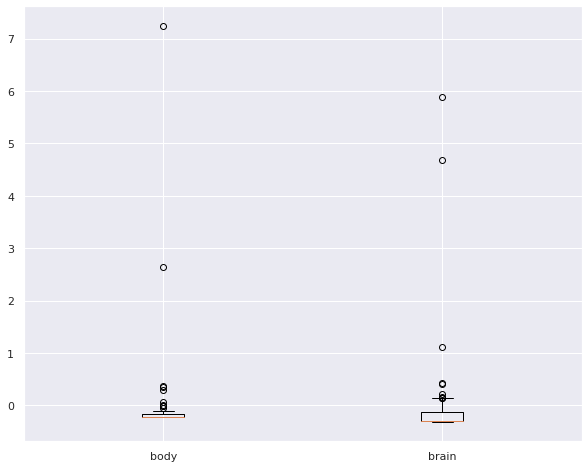

In [56]:
plt.figure(figsize=(10, 8))
ax = plt.axes()
mammals_z = mammals_z[labels_mammals].to_numpy()
plt.boxplot(mammals_z)
ax.set_xticklabels(labels_mammals);
plt.show()

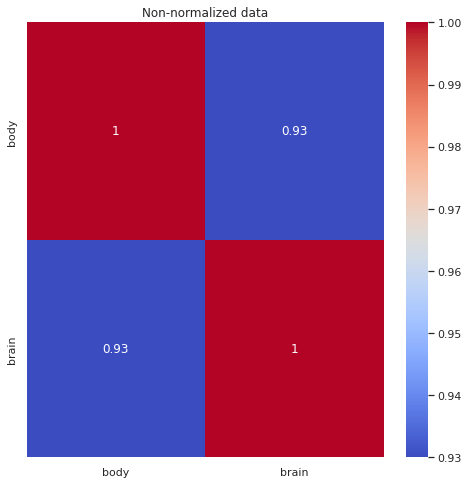

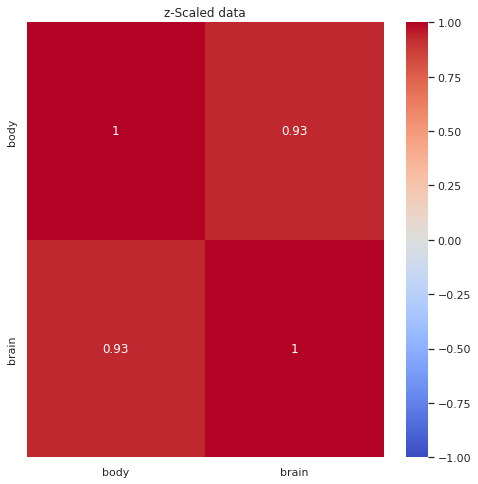

In [57]:
# Heatmap of collelations: all data = typical data
plt.figure(figsize=(8, 8))
correlation_matrix = mammals.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Non-normalized data")
plt.show()
plt.figure(figsize=(8, 8))
correlation_matrix = np.corrcoef(mammals_z.T)
sns.heatmap(data=correlation_matrix, annot=True, vmin=-1, vmax=1, cmap='coolwarm', xticklabels=labels_mammals,yticklabels=labels_mammals)
plt.title("z-Scaled data")
plt.show()

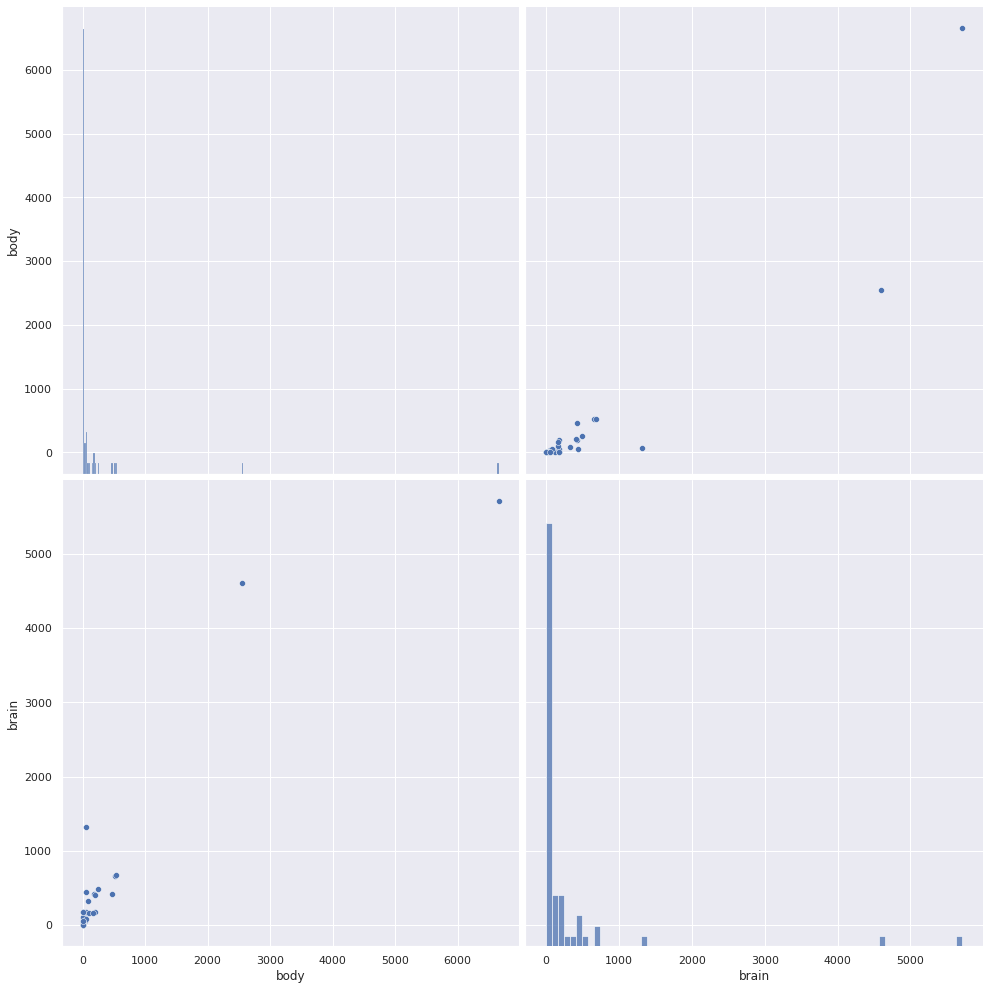

In [58]:
# Pair plots
# sns.pairplot(iris, hue='Mammal')
sns.pairplot(mammals,height=7, aspect=1.0)
# plt.show()

# Machine learning models

In [59]:
#@markdown Let us retrieve the basic two columns

body_data = mammals[['body']] # this is a dataframe
# body_data = mammals['body'] # this is a series of data, be watchful about that!

print(body_data)
print(body_data.shape)

brain_data = mammals[['brain']]
print(brain_data)
print(brain_data.shape)

       body
0     3.385
1     0.480
2     1.350
3   465.000
4    36.330
..      ...
57  160.000
58    0.900
59    1.620
60    0.104
61    4.235

[62 rows x 1 columns]
(62, 1)
    brain
0    44.5
1    15.5
2     8.1
3   423.0
4   119.5
..    ...
57  169.0
58    2.6
59   11.4
60    2.5
61   50.4

[62 rows x 1 columns]
(62, 1)


Let's look on relationship between body mass and brain mass. Let's visualiza our data.

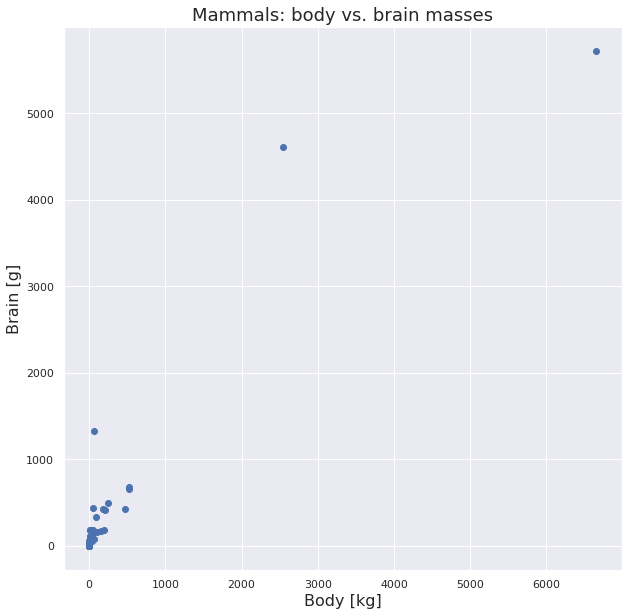

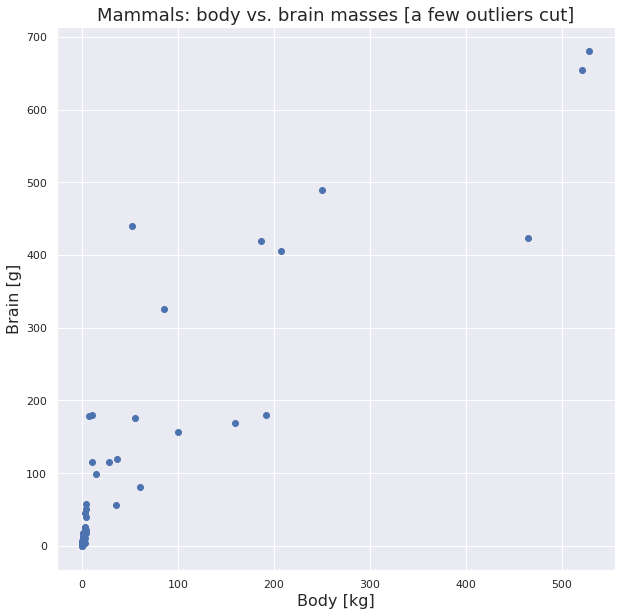

In [60]:
#@title Visualization of the data

plt.figure(figsize=(10, 10))
plt.scatter(body_data,brain_data)

plt.xlabel("Body [kg]", fontsize=16)
plt.ylabel("Brain [g]", fontsize=16)
plt.title("Mammals: body vs. brain masses", fontsize=18)
plt.show()

mammals_sorted = mammals.sort_values(by='brain', ascending=True)
plt.figure(figsize=(10, 10))
plt.scatter(mammals_sorted['body'].iloc[:-3],mammals_sorted['brain'].iloc[:-3])
plt.xlabel("Body [kg]", fontsize=16)
plt.ylabel("Brain [g]", fontsize=16)
plt.title("Mammals: body vs. brain masses [a few outliers cut]", fontsize=18)
plt.show()

In [ ]:
#@markdown Additionally, we can look for the extreme values...

# print(mammals['body'].min())
print("\nAnimal with the smallest body: ", mammals.loc[mammals['body'].idxmin()])
print("\nAnimal with the smallest brain: ", mammals.loc[mammals['brain'].idxmin()])
print("\nAnimal with the heaviest body: ", mammals.loc[mammals['body'].idxmax()])
print("\nAnimal with the heaviest brain: ", mammals.loc[mammals['brain'].idxmax()])

# Useful methods
## How to print column information

In [4]:
mammals.columns

Index(['Mammal', 'body', 'brain'], dtype='object')

## How to print dimensions of the data

In [5]:
mammals.shape

(62, 3)

## How to print number of rows

In [6]:
len(mammals)

62

## How to print number of elements

In [7]:
mammals.size

186

## How to print random samples

### By using iloc

In [11]:
mammals.iloc[-3:,:]

,Mammal,body,brain
59,Phalanger,1.620,11.4
60,Tree shrew,0.104,2.5
61,Red fox,4.235,50.4


Accessing one element (by using scalar):

In [15]:
mammals.iloc[0]

Mammal    Arctic fox
body           3.385
brain           44.5
Name: 0, dtype: object

Accessing more elements (by using list):

In [18]:
mammals.iloc[[0,1]]

,Mammal,body,brain
0,Arctic fox,3.385,44.5
1,Owl monkey,0.480,15.5


Accessing more objects (by using slice notation):

In [23]:
mammals.iloc[:3]

,Mammal,body,brain
0,Arctic fox,3.385,44.5
1,Owl monkey,0.480,15.5
2,Mountain beaver,1.350,8.1


Accessing some rows and some columns (by using slice notation):

In [27]:
mammals.iloc[0:5, 0:2]

,Mammal,body
0,Arctic fox,3.385
1,Owl monkey,0.480
2,Mountain beaver,1.350
3,Cow,465.000
4,Grey wolf,36.330


Accessing last rows and last columns:

In [29]:
mammals.iloc[-3:, -2:]

,body,brain
59,1.620,11.4
60,0.104,2.5
61,4.235,50.4


In [30]:
mammals.iloc[-3:,:]

,Mammal,body,brain
59,Phalanger,1.620,11.4
60,Tree shrew,0.104,2.5
61,Red fox,4.235,50.4


### By using sample

In [31]:
mammals.sample(3)

,Mammal,body,brain
0,Arctic fox,3.385,44.5
41,Okapi,250.000,490.0
14,Star-nosed mole,0.060,1.0


### How to drop records

Using direct index:

In [35]:
mammals_cut1 = mammals.drop(3)

Using condition:

In [36]:
mammals_cut2 = mammals.drop(mammals[(mammals['body'] >= 48) | (mammals['brain'] >= 166)].index)

# Links useful in this notebook

*   [What is quartile?](https://www.investopedia.com/terms/q/quartile.asp)
*   [Min-max and z-score normalization](https://www.codecademy.com/article/normalization)

